In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pcb_df = pd.read_csv('../ootp/ootp41219/players_career_batting_stats.csv')
p_df = pd.read_csv('../ootp/ootp41219/players.csv')

In [2]:
#Lets first look at the data

print('pcb: ',pcb_df.shape)
print('p: ',p_df.shape)

pcb:  (556470, 32)
p:  (53097, 98)


In [3]:
#Now lets merge
df = pd.merge(pcb_df, p_df, 
              left_on='player_id', 
              right_on='player_id', 
              how='left')

df shape: (11, 131)


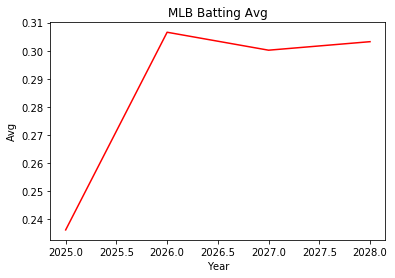

In [43]:
player = 46086

df = df.loc[df['split_id']==1]
df = df.loc[df['draft_year'] != 0]

df1 = df.loc[df['player_id']==player]

df1['batting_avg'] = df1['h']/df1['ab']
df1['peak mlb avg'] = df1['batting_avg'].where(df1['player_id'] == player,
                                            df1['level_id'] == 1).groupby(df1['level_id']).transform('max')

print('df shape:',df1.shape)
# The MLB is league 146

year = df1['year'].where(df1['player_id'] == player)
avg = df1['batting_avg'].where(df1['level_id'] == 1)
plt.plot(year, avg, color='r')
plt.xlabel('Year')
plt.ylabel('Avg')
plt.title('MLB Batting Avg')
plt.show()

In [46]:


year = df1['batting_avg'].where(df1['player_id'] == player)
level_id = df1['batting_avg'].where(df1['level_id'] != 100)

print(level_id, df1['level_id'])



516819    0.316514
516820    0.090909
516824    0.393939
516827    0.331034
516830    0.252137
516832    0.225000
516835    0.292398
516838    0.236111
516841    0.306569
516845    0.300172
516848    0.303207
Name: batting_avg, dtype: float64 516819    10
516820     6
516824     5
516827     6
516830     4
516832     3
516835     2
516838     1
516841     1
516845     1
516848     1
Name: level_id, dtype: int64
